In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier

## **Displaying the structure of the dataset**

Source of the dataset used in this project : https://archive.ics.uci.edu/ml/datasets/student+performance 

In [3]:
# Reading the dataset
df = pd.read_csv('dataset.csv')
df_new =df.drop(['passed'], axis=1)
df_new

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,PASS
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,P
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,P
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,P
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,P
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,P
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,P
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,F
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,P


In [4]:
# Checking the dataset if it of consists of null values or not

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# Storing all column names

features_head = list(df_new.columns.values)
features_head[:4]

['school', 'sex', 'age', 'address']

In [6]:
# In the dataset, there are non numerical values which we need to convert into numerical values for better analysis

for i in features_head:
  non_num_to_num = LabelEncoder()
  non_num_to_num.fit(df[i])
  df_new[i] = non_num_to_num.transform(df_new[i])
df_new 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,PASS
0,0,0,3,1,0,0,4,4,0,4,...,0,0,3,2,3,0,0,2,4,1
1,0,0,2,1,0,1,1,1,0,2,...,1,0,4,2,2,0,0,2,2,1
2,0,0,0,1,1,1,1,1,0,2,...,1,0,3,2,1,1,2,2,6,1
3,0,0,0,1,0,1,4,2,1,3,...,1,1,2,1,1,0,0,4,0,1
4,0,0,1,1,0,1,3,3,2,2,...,0,0,3,2,1,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,4,0,0,1,2,3,3,2,...,1,0,4,3,1,0,1,4,4,1
645,1,0,3,1,1,1,3,1,4,3,...,1,0,3,2,3,0,0,0,4,1
646,1,0,3,1,0,1,1,1,2,2,...,0,0,0,0,0,0,0,4,6,0
647,1,1,2,1,1,1,3,1,3,3,...,1,0,1,3,4,2,3,1,6,1


**Here, we shall visualize the dataset to get insights from the data**


In [7]:
# checking null values 

df_new.isnull().values.any()


False

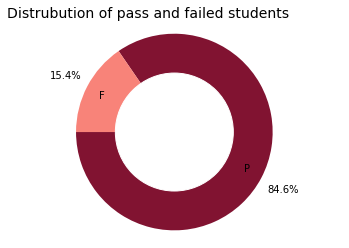

In [ ]:
# Visualizing the donut plot to understand the dataset

values = df_new['PASS'].value_counts()
labels = ["P","F"]
plt.title('Distrubution of pass and failed students', fontsize=14, loc='left')
inner_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(values, labels = labels, autopct='%1.1f%%',pctdistance = 1.25,startangle=180,
        labeldistance=.8, colors = ["#811331", "#F88379"])
plt.axis('equal')
plt.gca().add_artist(inner_circle)
plt.show();


**The above distrubution clearly demonstrates that this was an imbalance dataset, and that overfitting problem may occur when training the data.**

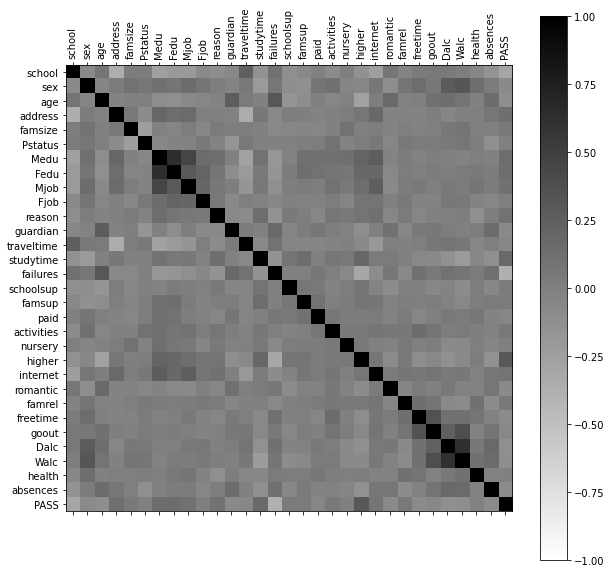

In [ ]:
# Lets visulaize how the data is correlated with other features

corr_viz = df_new.corr()
figure = plt.figure(figsize=(10,10))
axis = figure.add_subplot(111)
corr_axis = axis.matshow(corr_viz,cmap='binary', vmin=-1, vmax=1)
figure.colorbar(corr_axis)
flow = np.arange(0,len(df_new.columns),1)
axis.set_xticks(flow)
plt.xticks(rotation=90)
axis.set_yticks(flow)
axis.set_xticklabels(df_new.columns)
axis.set_yticklabels(df_new.columns)
plt.show()


In [ ]:
# +1 positive correlation -1 negative correlation

correlation = df_new.corr()
correlation

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,PASS
school,1.000000,-0.083050,0.087170,-0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,...,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163704,-0.297217
sex,-0.083050,1.000000,-0.043662,0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,...,0.065911,-0.110144,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.023980,-0.078222
age,0.087170,-0.043662,1.000000,-0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,-0.050846,...,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.153530,-0.110722
address,-0.354520,0.025503,-0.025848,1.000000,0.046113,-0.094635,0.190320,0.141493,0.159761,-0.006535,...,0.175794,-0.030939,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073354,0.126663
famsize,0.022252,0.098205,-0.002470,0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,-0.059443,...,0.013357,-0.032936,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.001169,0.052215
Pstatus,0.028120,0.064700,-0.005631,-0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.054306,...,0.059754,-0.053828,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.119600,-0.004241
Medu,-0.254787,0.119127,-0.107832,0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,...,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.012828,0.144803
Fedu,-0.209806,0.083913,-0.121050,0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,...,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.028715,0.146249
Mjob,-0.206829,0.149635,-0.071770,0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,0.202651,...,0.260658,-0.074286,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.026809,0.106564
Fjob,-0.081872,0.080466,-0.050846,-0.006535,-0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,...,0.088625,-0.002835,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.050386,0.002454


**The above correlation data was not so clear to interpret**

In [ ]:
corr = correlation.abs().unstack()
corr.sort_values(ascending = True)

Dalc      Fedu        0.000061
Fedu      Dalc        0.000061
internet  guardian    0.000412
guardian  internet    0.000412
goout     romantic    0.000520
                        ...   
          goout       1.000000
Dalc      Dalc        1.000000
Walc      Walc        1.000000
failures  failures    1.000000
PASS      PASS        1.000000
Length: 961, dtype: float64

In [ ]:
#Romving the duplicate correlated columns and sorting based on positivly correlated data
corr_high_values = correlation[correlation < 1].unstack().transpose().sort_values( ascending=False).drop_duplicates()
print(corr_high_values)

Medu        Fedu        0.647477
Walc        Dalc        0.616561
Mjob        Medu        0.459337
Walc        goout       0.388680
freetime    goout       0.346352
                          ...   
failures    higher     -0.309400
traveltime  address    -0.344902
school      address    -0.354520
PASS        failures   -0.380237
school      school           NaN
Length: 466, dtype: float64


In [ ]:
df_new.corr()['PASS'].sort_values( ascending=False)

PASS          1.000000
higher        0.309708
studytime     0.165111
Fedu          0.146249
Medu          0.144803
address       0.126663
Mjob          0.106564
reason        0.101215
internet      0.088215
famsize       0.052215
activities    0.047276
famrel        0.044987
famsup        0.037903
schoolsup     0.034527
Fjob          0.002454
Pstatus      -0.004241
nursery      -0.007751
health       -0.009979
paid         -0.053708
traveltime   -0.057869
goout        -0.067241
sex          -0.078222
romantic     -0.081177
guardian     -0.084384
absences     -0.087450
freetime     -0.093349
age          -0.110722
Walc         -0.116249
Dalc         -0.123627
school       -0.297217
failures     -0.380237
Name: PASS, dtype: float64

**Here we can see that they are few variables with positive and negative correlation, as +1 represents highly correlated and -1 represents low correlation, there is no need of removing any feature in the dataset**

# Model building

# **RANDOM FOREST MODEL**

In [ ]:
#Here we are spliting the dataset

from sklearn.preprocessing import StandardScaler
model = df_upsampled.to_numpy()
data_shape = model.shape[1]
x = model[:,0:n-1]
y = model[:,n-1]
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,test_size=0.2,random_state=0)
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
# Random forest model

classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)
Y_Pred = classifier.predict(X_Test)

In [ ]:
# Accuracy output

rftest=classifier.score(X_Test,Y_Test)
rftrain=classifier.score(X_Train,Y_Train)
print('Accuracy test is: ',rftest)
print('Accuracy train is: ',rftrain)

Accuracy test is:  0.9411764705882353
Accuracy train is:  1.0


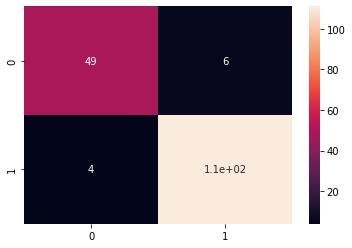

In [ ]:
#confusion matrix
cm = confusion_matrix(Y_Test, Y_Pred)
sns.heatmap(cm,annot=True)

In [ ]:
#printing classification report
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        55
           1       0.95      0.97      0.96       115

    accuracy                           0.94       170
   macro avg       0.94      0.93      0.93       170
weighted avg       0.94      0.94      0.94       170



## **DECISION TREE CLASIFIER, criteroin = ' Gini '**

In [ ]:
# Here we are splitting the dataset

model = df_upsampled.to_numpy()
n = model.shape[1]
x = model[:,0:n-1]
y = model[:,n-1]
xdg_train,xdg_test,ydg_train,ydg_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# model building using decision tree with criteroin = GINI

classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
classifier_gini.fit(xdg_train, ydg_train)
y_pred_gini = classifier_gini.predict(xdg_test)

In [ ]:
# Printing accuracy

dtgtest=classifier_gini.score(xdg_test,ydg_test)
dtgtrain=classifier_gini.score(xdg_train,ydg_train)
print('Accuracy test is: ',dtgtest)
print('Accuracy train is: ',dtgtrain)

Accuracy test is:  0.8588235294117647
Accuracy train is:  0.9484536082474226


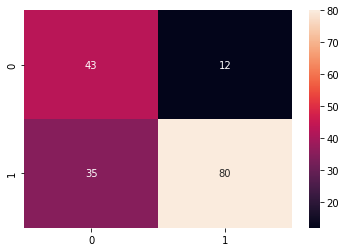

In [ ]:
#confusion matrix

cm = confusion_matrix(ydg_test,y_pred_gini)
sns.heatmap(cm,annot=True)

In [ ]:
# printing classification report

print(classification_report(ydg_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.55      0.78      0.65        55
           1       0.87      0.70      0.77       115

    accuracy                           0.72       170
   macro avg       0.71      0.74      0.71       170
weighted avg       0.77      0.72      0.73       170



## **DECISION TREE CLASIFIER, criteroin = ' Entropy '**

In [ ]:
# Here we are splitting the dataset

model = df_upsampled.to_numpy()
n = model.shape[1]
x = model[:,0:n-1]
y = model[:,n-1]
xde_train,xde_test,yde_train,yde_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# model building using decision tree with criteroin = Entropy

classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
classifier_entropy.fit(xde_train, yde_train)
y_pred_entropy = classifier_entropy.predict(xde_test)

In [ ]:
# printing accuracy

dtetest=classifier_entropy.score(xde_test,yde_test)
dtetrain=classifier_entropy.score(xde_train,yde_train)
print('Accuracy test is: ',dtetest)
print('Accuracy train is: ',dtetrain)

Accuracy test is:  0.8588235294117647
Accuracy train is:  0.9396170839469808


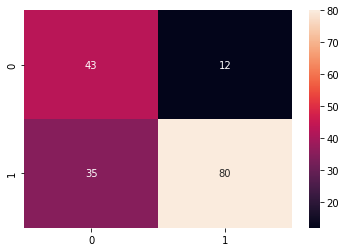

In [ ]:
# confusion matrix
cm = confusion_matrix(yde_test,y_pred_entropy)
sns.heatmap(cm,annot=True)

In [ ]:
#classification report
print(classification_report(yde_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.55      0.78      0.65        55
           1       0.87      0.70      0.77       115

    accuracy                           0.72       170
   macro avg       0.71      0.74      0.71       170
weighted avg       0.77      0.72      0.73       170



# **LOGISTIC REGRESSION MODEL**

In [8]:
# Dataset is imbalance so we are using upsampling technique to balance the dataset

df_fail = df_new[(df_new['PASS']==0)] 
df_pass = df_new[(df_new['PASS']==1)] 
df_fail_upsampled = resample(df_fail, replace=True, n_samples= 300,random_state=42) 
df_upsampled = pd.concat([df_fail_upsampled, df_pass])
df_upsampled

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,PASS
500,1,1,2,1,0,1,1,2,2,2,...,1,1,4,2,4,4,4,0,12,0
626,1,0,3,0,0,1,4,4,2,4,...,1,1,2,1,1,3,1,4,0,0
175,0,1,2,0,0,1,3,2,2,2,...,1,1,3,3,3,0,3,2,4,0
567,1,1,3,0,0,1,3,2,3,2,...,1,0,1,2,0,1,1,4,0,0
522,1,0,1,1,0,1,4,4,1,1,...,1,1,3,2,3,0,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1,0,3,0,0,1,4,4,4,0,...,1,1,3,3,2,1,1,4,4,1
644,1,0,4,0,0,1,2,3,3,2,...,1,0,4,3,1,0,1,4,4,1
645,1,0,3,1,1,1,3,1,4,3,...,1,0,3,2,3,0,0,0,4,1
647,1,1,2,1,1,1,3,1,3,3,...,1,0,1,3,4,2,3,1,6,1


In [9]:
# Here we are spliting the dataset into 80-20 split. 80% : training data 20%: test dataset

model = df_upsampled.to_numpy()
n = model.shape[1]
x = model[:,0:n-1]
y = model[:,n-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [10]:
# Here we are fiting the dataset and predicting the output for test dataset

logisticRegr = LogisticRegression(C=1)
logisticRegr.fit(x_train,y_train)
y_pred=logisticRegr.predict(x_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [11]:
#Accuracy output

logtest=logisticRegr.score(x_test,y_test)
logtrain=logisticRegr.score(x_train,y_train)
print('Accuracy test is: ',logtest)
print('Accuracy train is: ',logtrain)

Accuracy test is:  0.7981220657276995
Accuracy train is:  0.8034591194968553


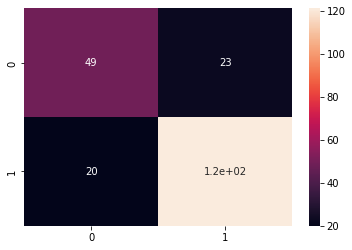

In [12]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [13]:
# Here we are displaying precision, recall, f1-score, support

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70        72
           1       0.84      0.86      0.85       141

    accuracy                           0.80       213
   macro avg       0.78      0.77      0.77       213
weighted avg       0.80      0.80      0.80       213



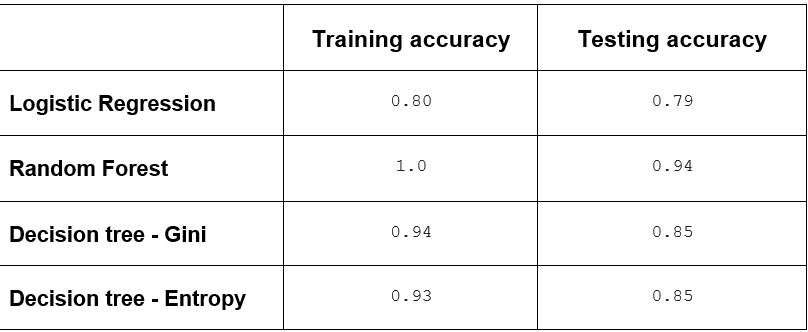